<a href="https://colab.research.google.com/github/stevearonson/VB-Video-Tracking/blob/master/Detectron2_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install dependencies: 
!pip install pyyaml==5.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

     |████████████████████████████████| 276kB 16.8MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44075 sha256=51ac15623640a3e7193a8d2c2e3e81028ba38fb2ecf907426713f464344671c9
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
1.7.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.7)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
import torch
assert torch.__version__.startswith("1.7")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
     |████████████████████████████████| 6.8MB 741kB/s 
     |████████████████████████████████| 2.2MB 19.2MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.3.post20210204-cp36-none-any.whl size=44945 sha256=4b752356381ed86de93b2deb4990c7b4137b78fbd2f9e29707688869b5e69a2b
  Stored in directory: /root/.cache/pip/wheels/7a/d5/3d/1393f94e0a0c6345f674387da5bd382c9aba98a23371a3804e
  Created wheel for iopath: filename=iopath-0.1.3-cp36-none-any.whl size=11169 sha256=7e38ddfdfc1a07631db19cb2312a483eb7aec7de9a273fd00af78f5993fe2ed6
  Stored in directory: /root/.cache/pip/wheels/a9/1d/55/94a55e032409ac7617f9cbb88a0fa2cf4e7208806c29730804
Successfully built fvcore iopath
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.

In [3]:
!pip uninstall -y opencv-python-headless opencv-contrib-python
!apt install python3-opencv  # the one pre-installed have some issues
!pip install pillow==4.1.1
%reload_ext autoreload
%autoreload

Uninstalling opencv-contrib-python-4.1.2.30:
  Successfully uninstalled opencv-contrib-python-4.1.2.30
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  python3-opencv
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 534 kB of archives.
After this operation, 2,941 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 python3-opencv amd64 3.2.0+dfsg-4ubuntu0.1 [534 kB]
Fetched 534 kB in 1s (905 kB/s)
Selecting previously unselected package python3-opencv.
(Reading database ... 146456 files and directories currently installed.)
Preparing to unpack .../python3-opencv_3.2.0+dfsg-4ubuntu0.1_amd64.deb ...
Unpacking python3-opencv (3.2.0+dfsg-4ubuntu0.1) ...
Setting up python3-opencv (3.2.0+dfsg-4ubuntu0.1) ...
     |████████████████████████████████| 5.7MB 16.0MB/s 
     |████████████████████████████████| 112kB 60.2MB

In [1]:
!git clone https://github.com/facebookresearch/detectron2

Cloning into 'detectron2'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 10111 (delta 12), reused 19 (delta 7), pack-reused 10070
Receiving objects: 100% (10111/10111), 4.21 MiB | 27.61 MiB/s, done.
Resolving deltas: 100% (7308/7308), done.


In [2]:
!ls detectron2/configs/COCO-Keypoints/

Base-Keypoint-RCNN-FPN.yaml	 keypoint_rcnn_R_50_FPN_3x.yaml
keypoint_rcnn_R_101_FPN_3x.yaml  keypoint_rcnn_X_101_32x8d_FPN_3x.yaml
keypoint_rcnn_R_50_FPN_1x.yaml


In [3]:
from google.colab import drive
drive.mount('/gdrive')
vbfolder = r'/gdrive/My Drive/VB/Video/'
!ls "{vbfolder}"

Mounted at /gdrive
 ball_tracker.mp4	      input.jpg			 people.mp4
 Cheshire_Halasz_Perin	      input.mp4			 player_pos.csv
 Cheshire_Halasz_Perin.pdf    InstanceSegmentation.jpg	 tracker.mp4
'CHVC M6 S3.mp4'	      Keypoints.jpg		 tracker_trails.jpg
 ckpt.t7		      Keypoints.mkv		 Untitled.ipynb
 court-diagram.jpg	     'MBVF M7 S3.mp4'		 video-clip.mp4
 court-diagram-vertical.jpg   model_final.pth		 voc2coco.py
 demo.avi		      OpenCV.ipynb
 image			      panopt.mp4


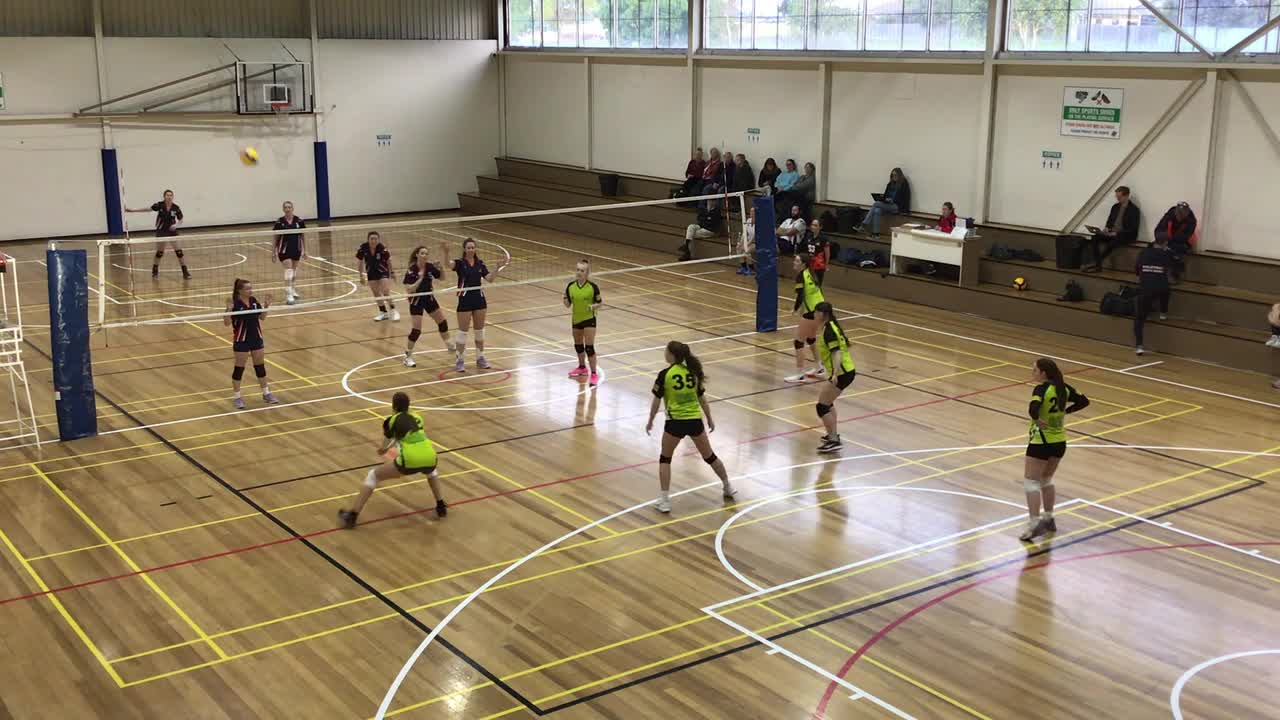

In [4]:
import os, json, cv2
from google.colab.patches import cv2_imshow
im = cv2.imread(vbfolder + "input.jpg")
cv2_imshow(im)

In [5]:
!python detectron2/demo/demo.py \
    --config-file detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml \
    --input "{vbfolder}"input.jpg \
    --output "{vbfolder}"InstanceSegmentation.jpg \
    --opts MODEL.WEIGHTS detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl \

Failed to load OpenCL runtime
** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

[02/04 20:02:53 detectron2]: Arguments: Namespace(confidence_threshold=0.5, config_file='detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml', input=['/gdrive/My Drive/VB/Video/input.jpg'], opts=['MODEL.WEIGHTS', 'detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl'], output='/gdrive/My Drive/VB/Video/InstanceSegmentation.jpg', video_input=None, webcam=False)
[02/04 20:03:05 fvcore.common.checkpoint]: Loading checkpoint from detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl
model_final_f10217.pkl: 178MB [00:07, 24.3MB/s]               
[02/04

In [21]:
!ls -ls

total 320
  4 drwxr-xr-x 15 root root   4096 Feb  4 19:46 detectron2
312 -rw-r--r--  1 root root 319150 Feb  4 19:56 InstanceSegmentation.jpg
  4 drwxr-xr-x  1 root root   4096 Feb  1 17:27 sample_data


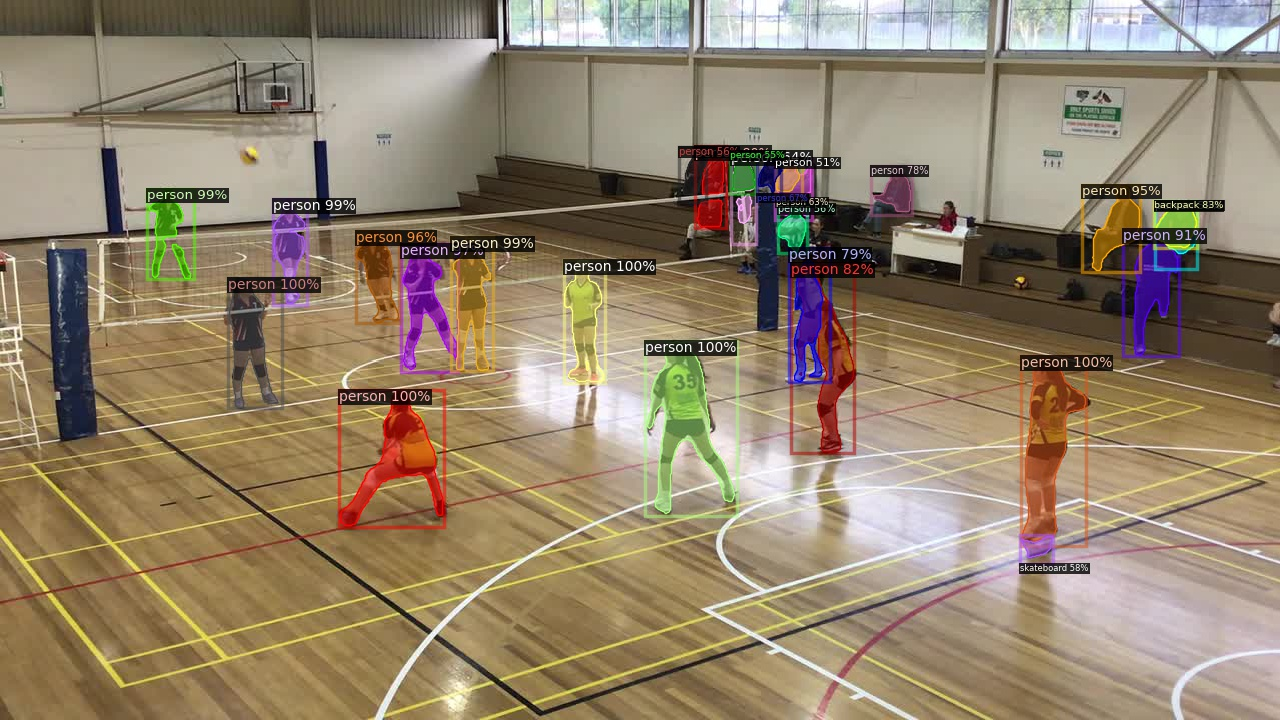

In [6]:
im = cv2.imread(vbfolder + "InstanceSegmentation.jpg")
cv2_imshow(im)

In [7]:
!python detectron2/demo/demo.py \
    --config-file detectron2/configs/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml \
    --input "{vbfolder}"input.jpg \
    --output "{vbfolder}"Keypoints.jpg \
    --opts MODEL.WEIGHTS detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl \

Failed to load OpenCL runtime
** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

[02/04 20:03:29 detectron2]: Arguments: Namespace(confidence_threshold=0.5, config_file='detectron2/configs/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml', input=['/gdrive/My Drive/VB/Video/input.jpg'], opts=['MODEL.WEIGHTS', 'detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl'], output='/gdrive/My Drive/VB/Video/Keypoints.jpg', video_input=None, webcam=False)
[02/04 20:03:34 fvcore.common.checkpoint]: Loading checkpoint from detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl
model_final_a6e10b.pkl: 237MB [00:10, 22.3MB/s]               
[02/04 20:03:45 fvcore.common.checkpoi

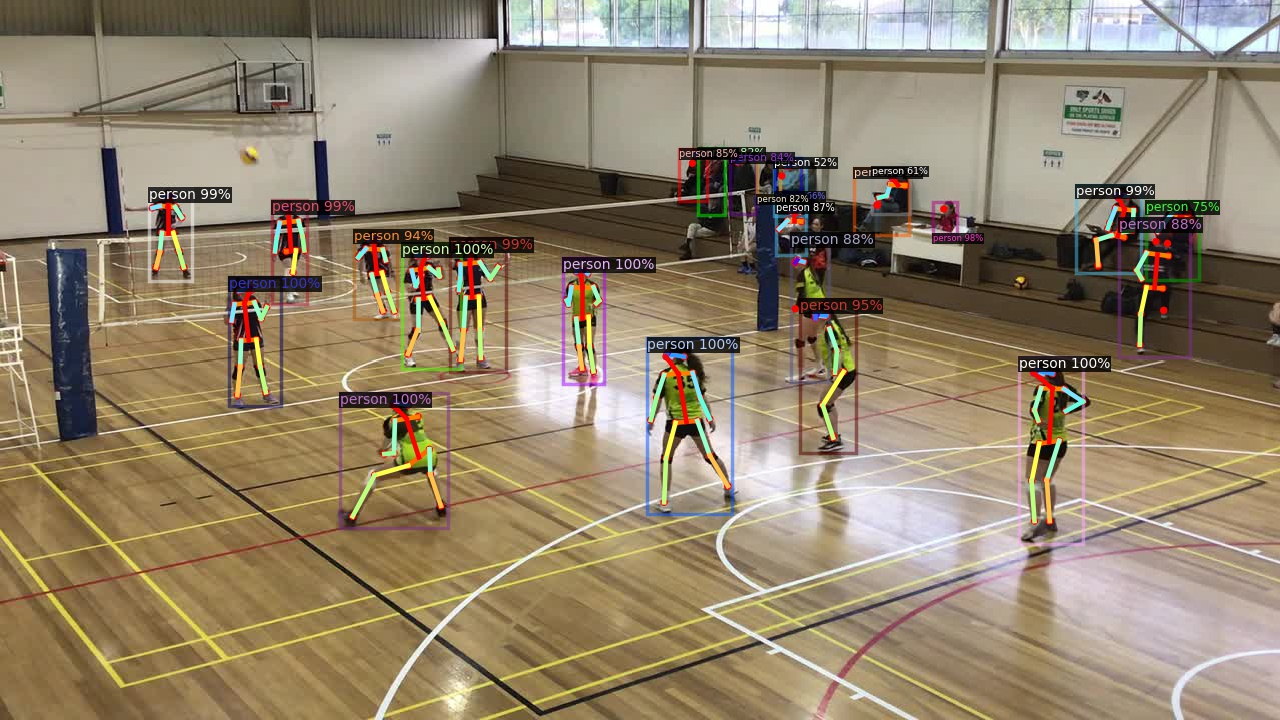

In [8]:
im = cv2.imread(vbfolder + "Keypoints.jpg")
cv2_imshow(im)

In [10]:
!python detectron2/demo/demo.py \
    --config-file detectron2/configs/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml \
    --video-input "{vbfolder}"input.mp4 \
    --output "{vbfolder}"Keypoints.mkv \
    --opts MODEL.WEIGHTS detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl \

Failed to load OpenCL runtime
** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

[02/04 20:04:25 detectron2]: Arguments: Namespace(confidence_threshold=0.5, config_file='detectron2/configs/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml', input=None, opts=['MODEL.WEIGHTS', 'detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl'], output='/gdrive/My Drive/VB/Video/Keypoints.mkv', video_input='/gdrive/My Drive/VB/Video/input.mp4', webcam=False)
[02/04 20:04:30 fvcore.common.checkpoint]: Loading checkpoint from detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl
[02/04 20:04:30 fvcore.common.checkpoint]: Reading a file from 'Detectron2 Model Zoo'
  0% 0/354 [00:00